# Outliers Detection & Removing Techniques

#### Using IQR---> because the data is not normally distributed!!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv(r'C:\Users\Satyam\Downloads\covid\country_wise_latest.csv')

In [3]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

<AxesSubplot:xlabel='Confirmed'>

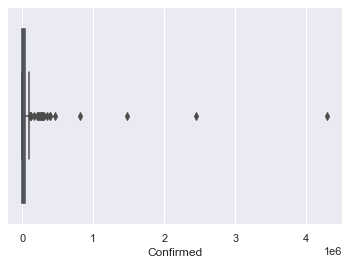

In [5]:
sns.boxplot(x = "Confirmed",data = df)

In [6]:
df['Confirmed'].max()

4290259

In [7]:
df['Confirmed'].min()

10

C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


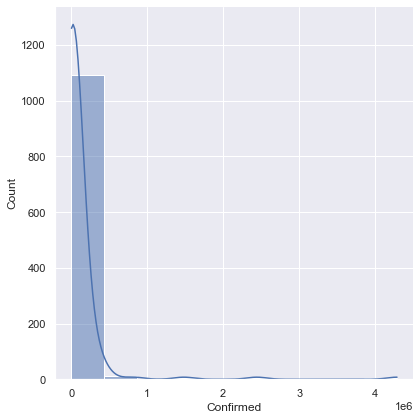

In [8]:
sns.displot(x = 'Confirmed',data = df,kde = True,height=6,weights=6)
# plt.subplots(figsize = (12,8))

In [9]:
df.Confirmed.nunique()

184

Confirmed                    AxesSubplot(0.125,0.787927;0.352273x0.0920732)
Deaths                    AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
Recovered                    AxesSubplot(0.125,0.677439;0.352273x0.0920732)
Active                    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
New cases                    AxesSubplot(0.125,0.566951;0.352273x0.0920732)
New deaths                AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
New recovered                AxesSubplot(0.125,0.456463;0.352273x0.0920732)
Deaths / 100 Cases        AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
Recovered / 100 Cases        AxesSubplot(0.125,0.345976;0.352273x0.0920732)
Deaths / 100 Recovered    AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
Confirmed last week          AxesSubplot(0.125,0.235488;0.352273x0.0920732)
1 week change             AxesSubplot(0.547727,0.235488;0.352273x0.0920732)
1 week % increase               AxesSubplot(0.125,0.125;0.352273x0.0920732)
dtype: objec

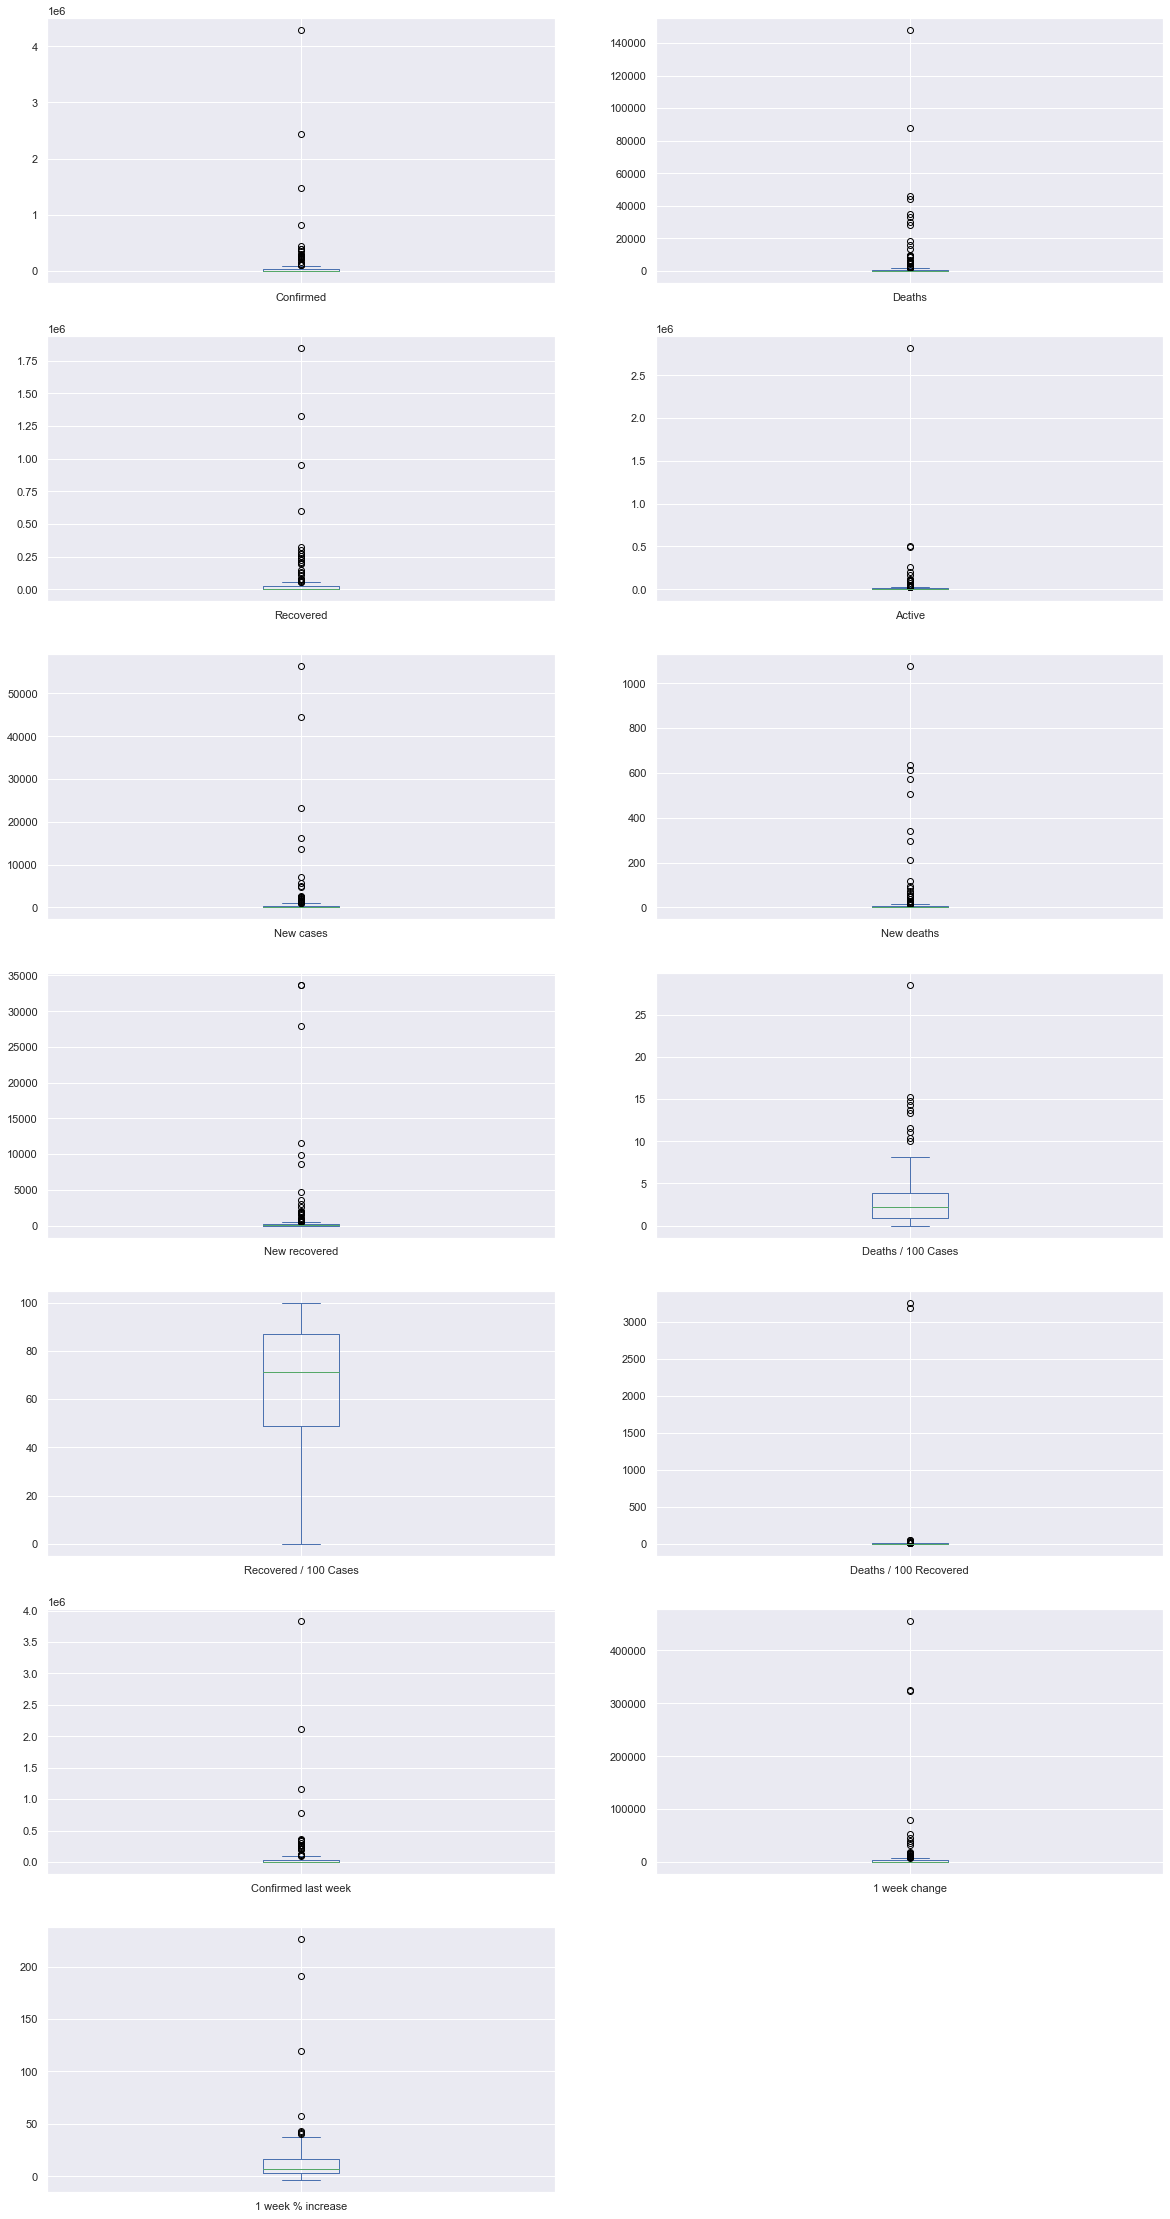

In [10]:
df.plot(kind = 'box',subplots = True,layout = (7,2),figsize = (20,40))

In [11]:
# detect outliers in Confirmed col.
df.Confirmed.skew()

8.725676203152531

In [12]:
df.Confirmed.describe()

count    1.870000e+02
mean     8.813094e+04
std      3.833187e+05
min      1.000000e+01
25%      1.114000e+03
50%      5.059000e+03
75%      4.046050e+04
max      4.290259e+06
Name: Confirmed, dtype: float64

C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Confirmed'>

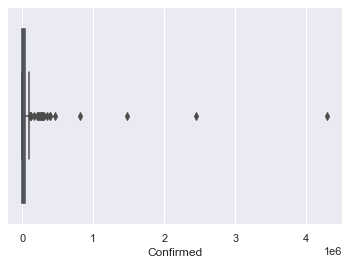

In [13]:
sns.boxplot(df['Confirmed'])

In [14]:
# find iqr
per_25 = df['Confirmed'].quantile(0.25)
per_75 = df['Confirmed'].quantile(0.75)

In [15]:
per_25

1114.0

In [16]:
per_75

40460.5

In [17]:
iqr = per_75-per_25

In [18]:
iqr

39346.5

In [19]:
upper_limit = per_75+1.5*iqr
lower_limit = per_25-1.5*iqr

In [20]:
upper_limit

99480.25

In [21]:
lower_limit

-57905.75

In [22]:
# finding outliers
df[df['Confirmed']>upper_limit]

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
13,Bangladesh,226225,2965,125683,97577,2772,37,1801,1.31,55.56,2.36,207453,18772,9.05,South-East Asia
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
32,Canada,116458,8944,0,107514,682,11,0,7.68,0.00,inf,112925,3533,3.13,Americas
35,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
37,Colombia,257101,8777,131161,117163,16306,508,11494,3.41,51.02,6.69,204005,53096,26.03,Americas
61,France,220352,30212,81212,108928,2551,17,267,13.71,36.86,37.20,214023,6329,2.96,Europe
65,Germany,207112,9125,190314,7673,445,1,259,4.41,91.89,4.79,203325,3787,1.86,Europe
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
80,Indonesia,100303,4838,58173,37292,1525,57,1518,4.82,58.00,8.32,88214,12089,13.70,South-East Asia


In [23]:
# found no outlier due to skewness
df[df['Confirmed']<lower_limit]

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region


# Trimming

In [24]:
new_df = df[df['Confirmed']<upper_limit]

In [25]:
print(df.shape[0])
print(new_df.shape[0])

187
163


In [26]:
187-163

24

<Figure size 1152x576 with 0 Axes>

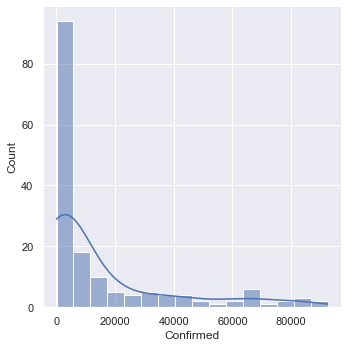

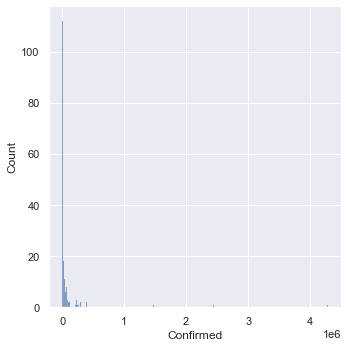

In [36]:
plt.figure(figsize= (16,8))
# plt.subplot(2,2,1)
sns.displot(new_df['Confirmed'],kde = True)
sns.displot(df['Confirmed'])

# Capping

In [28]:
new_df_cap = df.copy()

In [29]:
new_df_cap['Confirmed']=np.where(
    new_df_cap['Confirmed']> upper_limit,
    upper_limit,
    np.where(
    new_df_cap['Confirmed']<lower_limit,
    lower_limit,
    new_df_cap['Confirmed']
    )
)

In [30]:
new_df_cap.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263.0,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880.0,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973.0,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907.0,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950.0,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


<Figure size 864x576 with 0 Axes>

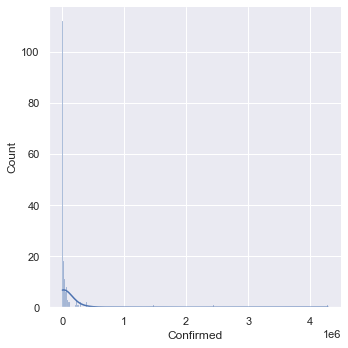

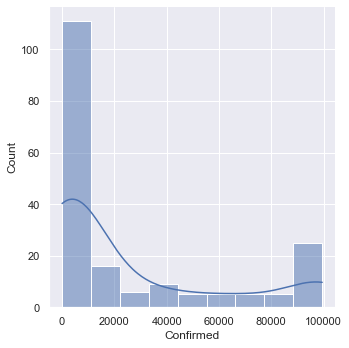

In [31]:
plt.figure(figsize=(12,8))
sns.displot(df['Confirmed'],kde = True)
sns.displot(new_df_cap['Confirmed'],kde = True)

In [32]:
new_df_cap.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [33]:
df.shape

(187, 15)

Confirmed                    AxesSubplot(0.125,0.787927;0.352273x0.0920732)
Deaths                    AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
Recovered                    AxesSubplot(0.125,0.677439;0.352273x0.0920732)
Active                    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
New cases                    AxesSubplot(0.125,0.566951;0.352273x0.0920732)
New deaths                AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
New recovered                AxesSubplot(0.125,0.456463;0.352273x0.0920732)
Deaths / 100 Cases        AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
Recovered / 100 Cases        AxesSubplot(0.125,0.345976;0.352273x0.0920732)
Deaths / 100 Recovered    AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
Confirmed last week          AxesSubplot(0.125,0.235488;0.352273x0.0920732)
1 week change             AxesSubplot(0.547727,0.235488;0.352273x0.0920732)
1 week % increase               AxesSubplot(0.125,0.125;0.352273x0.0920732)
dtype: objec

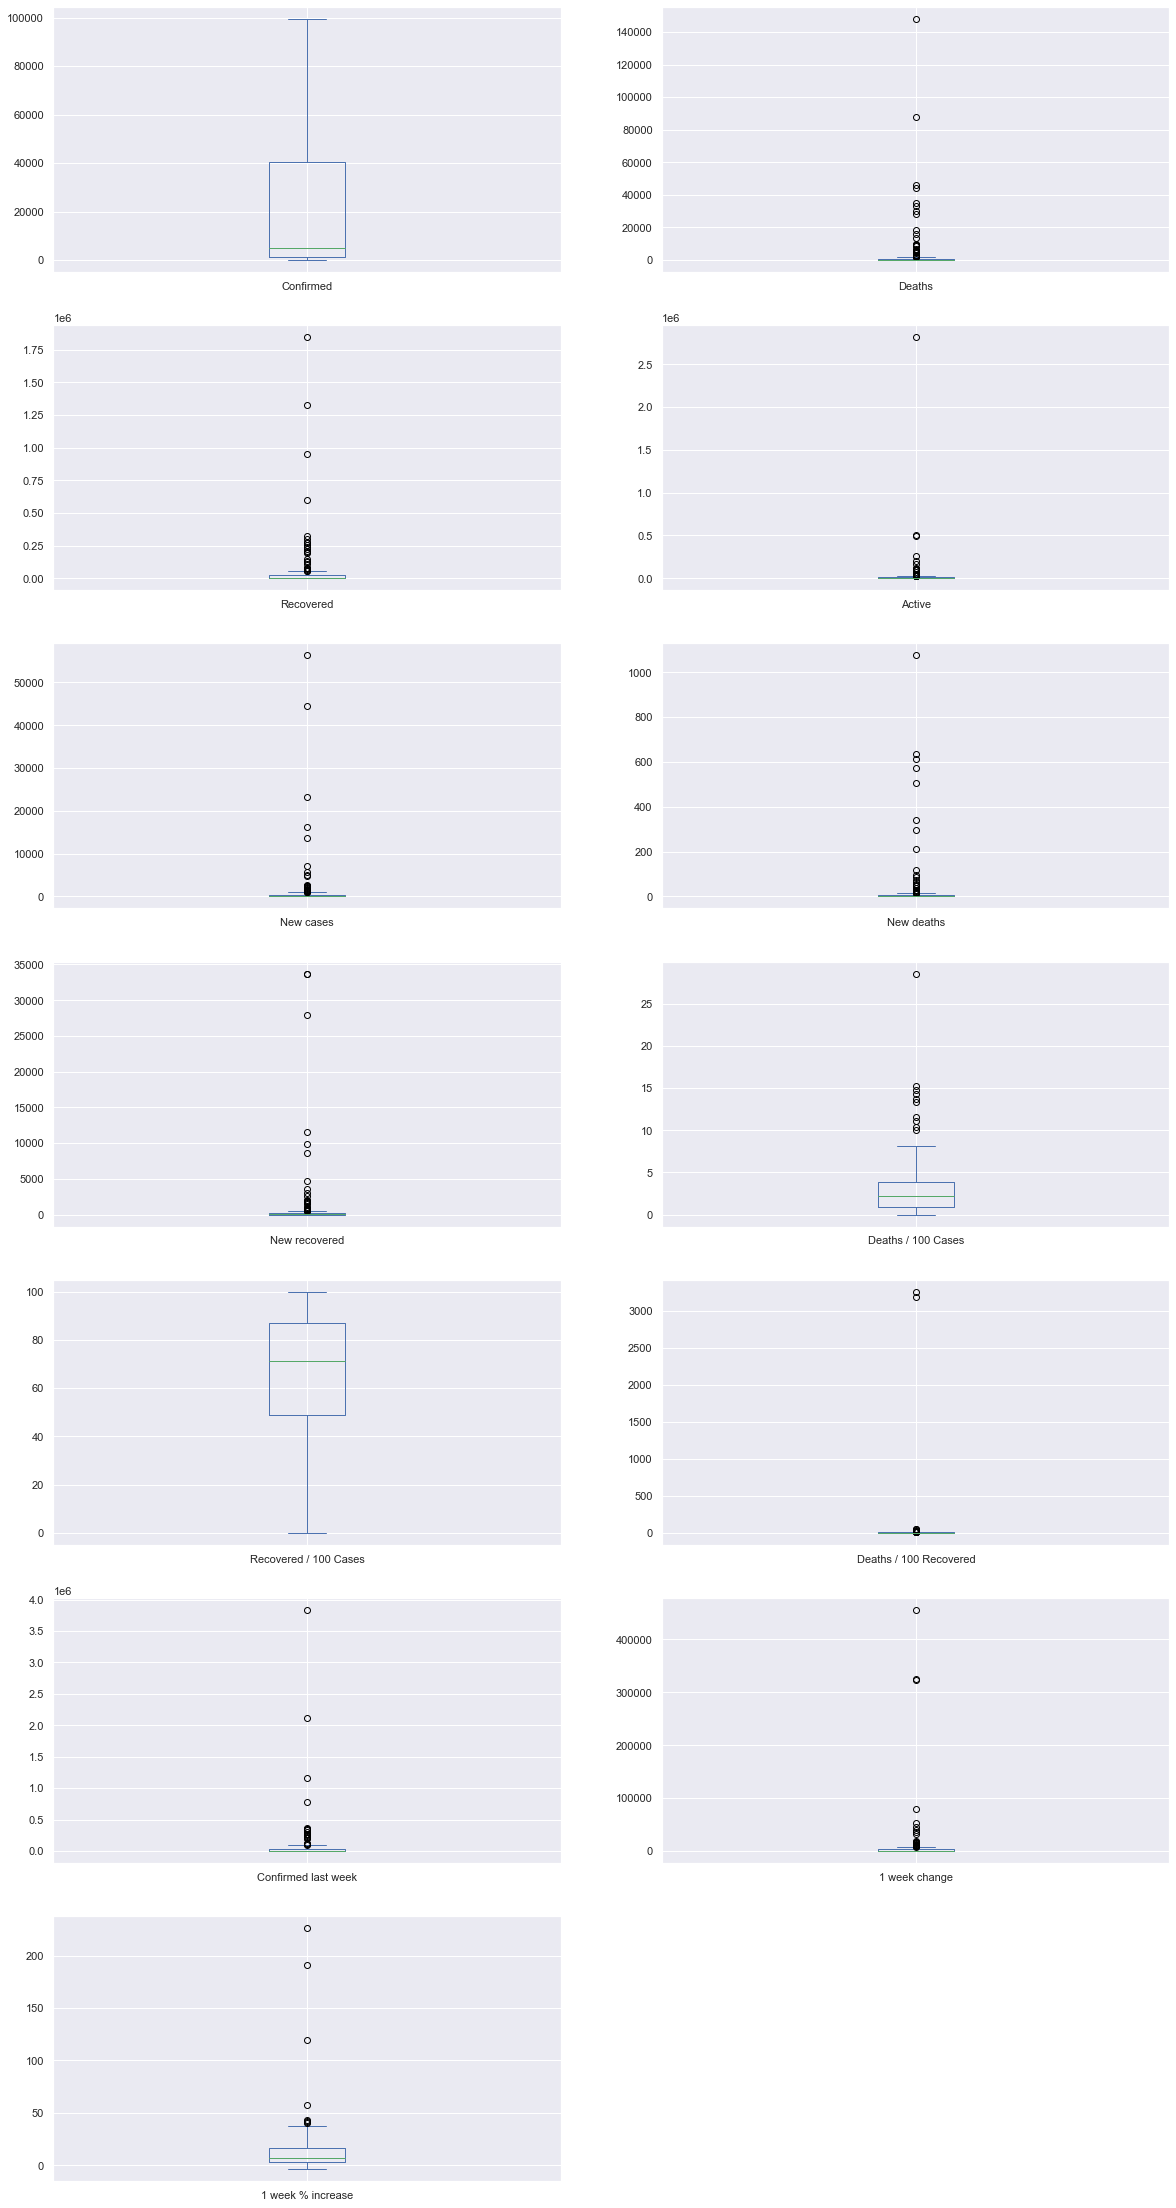

In [38]:
# here capping is the best way to remove outliers in the dataset.
new_df_cap.plot(kind = 'box',subplots = True,layout = (7,2),figsize = (20,40))